In [63]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import os
import pickle
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [64]:
df=pd.read_csv('train.csv')

In [65]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [66]:
X=df.drop('price_range',axis=1)
y=df['price_range']

In [67]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Text(0, 0.5, 'Count')

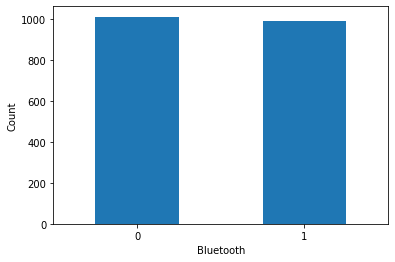

In [68]:
df['blue'].value_counts().sort_index().plot(kind='bar',rot=0)
plt.xlabel('Bluetooth')
plt.ylabel('Count')

In [69]:
df.columns


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [70]:
len(df['ram'].unique())

1562

In [71]:
df['fc']=np.where(df['fc']==0,df['fc'].median(),df['fc'])

In [72]:
df['fc'].unique()

array([ 1.,  3.,  2., 13.,  4.,  5.,  7., 11., 12., 16.,  6., 15.,  8.,
        9., 10., 18., 17., 14., 19.])

Text(0, 0.5, 'Count')

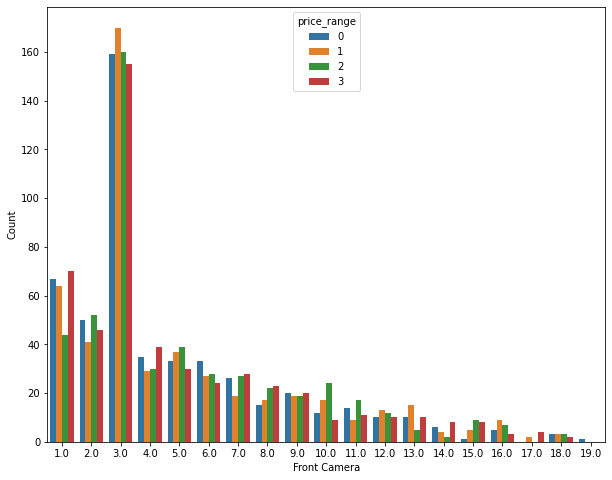

In [73]:
fig,ax=plt.subplots(figsize=(10,8))
sns.countplot(df['fc'],hue=df['price_range'])
plt.xlabel('Front Camera')
plt.ylabel('Count')

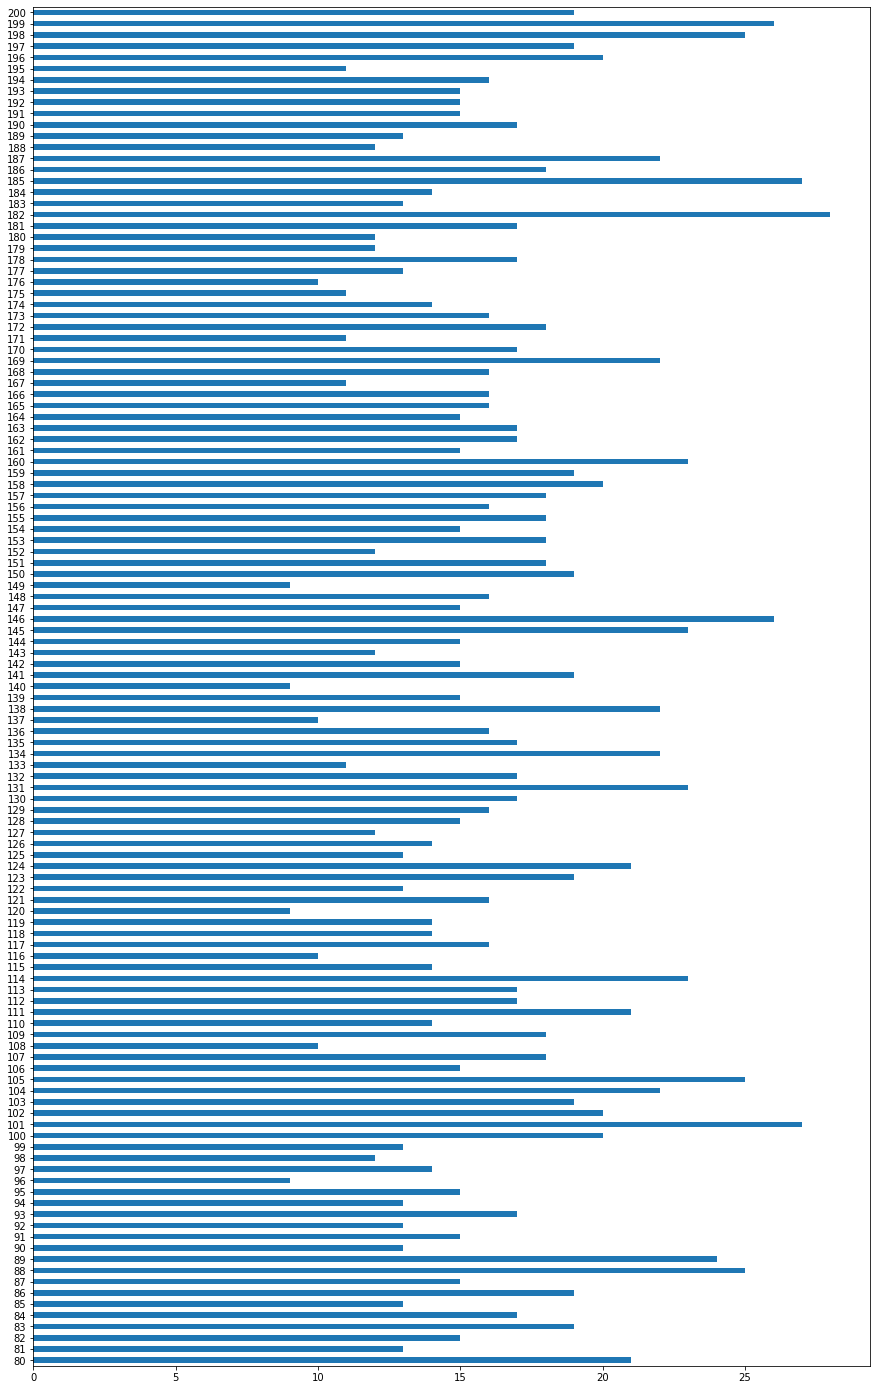

In [74]:
df['mobile_wt'].value_counts().sort_index().plot(kind='barh',figsize=(15,25))

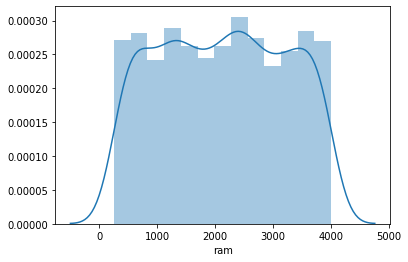

In [75]:
sns.distplot(df['ram'])

In [76]:
cor=df.loc[:,['four_g','three_g']].corr()
cor

,four_g,three_g
four_g,1.000000,0.584246
three_g,0.584246,1.000000


Text(0, 0.5, 'Count')

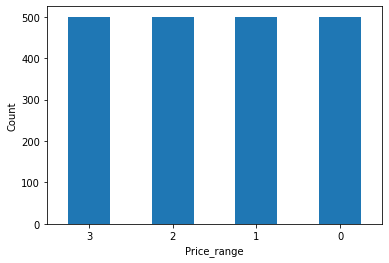

In [77]:
count=df['price_range'].value_counts()
count.plot(kind='bar',rot=0)
plt.xlabel('Price_range')
plt.ylabel('Count')

In [78]:
scorefun=SelectKBest(score_func=chi2)
fit=scorefun.fit(X,y)

In [79]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)

In [80]:
featureselect=pd.concat([dfscores,dfcolumns],axis=1)
featureselect.columns=["score","features"]

In [81]:
featureselect

,score,features
0,14129.866576,battery_power
1,0.723232,blue
2,0.648366,clock_speed
3,0.631011,dual_sim
4,10.135166,fc
5,1.521572,four_g
6,89.839124,int_memory
7,0.745820,m_dep
8,95.972863,mobile_wt
9,9.097556,n_cores


In [82]:
print(featureselect.nlargest(6,'score'))

            score       features
13  931267.519053            ram
11   17363.569536      px_height
0    14129.866576  battery_power
12    9810.586750       px_width
8       95.972863      mobile_wt
6       89.839124     int_memory


In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [84]:
model=RandomForestClassifier(n_estimators=10)

In [85]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [86]:
y_pred=model.predict(X_test)

In [87]:
confusion_matrix(y_test,y_pred)

array([[ 89,   6,   0,   0],
       [  7,  71,  14,   0],
       [  0,  15,  73,  11],
       [  0,   0,  11, 103]])

In [88]:
accuracy_score(y_test,y_pred)

0.84

In [89]:
df1=pd.read_csv('test.csv')
df1=df1.drop('id',axis=1)

In [90]:
y_pred1=model.predict(df1)

In [91]:
from sklearn.model_selection import cross_val_score

In [92]:
scores=cross_val_score(model,X_train,y_train,cv=10)

In [93]:
scores

array([0.84375, 0.7875 , 0.825  , 0.7875 , 0.7625 , 0.83125, 0.80625,
       0.8    , 0.8    , 0.7875 ])

In [94]:
scores.mean()

0.803125

In [95]:
with open('model.pkl','wb') as f:
    pickle.dump(model,f)

In [112]:
X1=df.loc[:,['ram','px_height','px_width','battery_power','mobile_wt','int_memory']]

In [113]:
y1=df['price_range']

In [114]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.20,random_state=0)

In [115]:
model1=RandomForestClassifier(n_estimators=10)

In [116]:
model1.fit(X_train1,y_train1)

RandomForestClassifier(n_estimators=10)

In [117]:
y_pred1=model1.predict(X_test1)

In [118]:
accuracy_score(y_test1,y_pred1)

0.9

In [119]:
score=cross_val_score(model1,X_train1,y_train1,cv=10)

In [120]:
score

array([0.86875, 0.88125, 0.9125 , 0.88125, 0.875  , 0.8625 , 0.84375,
       0.8125 , 0.86875, 0.89375])

In [121]:
score.mean()

0.8700000000000001

In [122]:
with open('model1.pkl','wb') as f:
    pickle.dump(model1,f)

In [123]:
X1

,ram,px_height,px_width,battery_power,mobile_wt,int_memory
0,2549,20,756,842,188,7
1,2631,905,1988,1021,136,53
2,2603,1263,1716,563,145,41
3,2769,1216,1786,615,131,10
4,1411,1208,1212,1821,141,44
...,...,...,...,...,...,...
1995,668,1222,1890,794,106,2
1996,2032,915,1965,1965,187,39
1997,3057,868,1632,1911,108,36
1998,869,336,670,1512,145,46


In [124]:
y1

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [125]:
y1.unique()

array([1, 2, 3, 0])

In [126]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,3.0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2.0,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,3.0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13.0,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,3.0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,3.0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1.0,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4.0,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
